In [81]:
import pandas as pd
import matplotlib.pyplot as plt

In [82]:
csv = pd.read_csv("./2019-Oct.csv")

In [83]:
csv.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2019-10-01 00:00:00 UTC,view,44600062,2103807459595387724,NaN,shiseido,35.79,541312140,72d76fde-8bb3-4e00-8c23-a032dfed738c
1,2019-10-01 00:00:00 UTC,view,3900821,2053013552326770905,appliances.environment.water_heater,aqua,33.20,554748717,9333dfbd-b87a-4708-9857-6336556b0fcc
2,2019-10-01 00:00:01 UTC,view,17200506,2053013559792632471,furniture.living_room.sofa,NaN,543.10,519107250,566511c2-e2e3-422b-b695-cf8e6e792ca8
3,2019-10-01 00:00:01 UTC,view,1307067,2053013558920217191,computers.notebook,lenovo,251.74,550050854,7c90fc70-0e80-4590-96f3-13c02c18c713
4,2019-10-01 00:00:04 UTC,view,1004237,2053013555631882655,electronics.smartphone,apple,1081.98,535871217,c6bd7419-2748-4c56-95b4-8cec9ff8b80d


In [84]:
csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42448764 entries, 0 to 42448763
Data columns (total 9 columns):
 #   Column         Dtype  
---  ------         -----  
 0   event_time     object 
 1   event_type     object 
 2   product_id     int64  
 3   category_id    int64  
 4   category_code  object 
 5   brand          object 
 6   price          float64
 7   user_id        int64  
 8   user_session   object 
dtypes: float64(1), int64(3), object(5)
memory usage: 2.8+ GB


In [85]:
#결측치 확인
csv.isnull().any(axis=0)

event_time       False
event_type       False
product_id       False
category_id      False
category_code     True
brand             True
price            False
user_id          False
user_session      True
dtype: bool

In [86]:
#쇼핑형태확인 - 아이쇼핑, 장바구니담기, 구매
volume = csv["event_type"].value_counts()
volume

view        40779399
cart          926516
purchase      742849
Name: event_type, dtype: int64

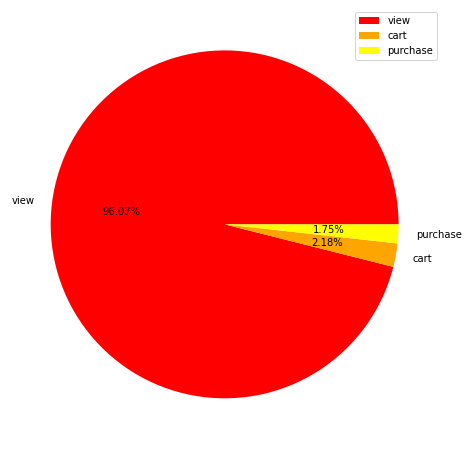

In [106]:
plt.pie(volume
        , labels = volume.index
        , colors = ['red', 'orange','yellow']
        , autopct = '%.2f%%'
        )
plt.legend()

In [88]:
csv["category_code"].isna().sum()

13515609

In [89]:
#구매했지만 카데고리를 알수 없는 상품
csv[csv["event_type"] == "purchase"][csv["category_code"].isna()]

C:\Users\Gak\AppData\Local\Temp/ipykernel_23092/3706445626.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  csv[csv["event_type"] == "purchase"][csv["category_code"].isna()]


,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
379,2019-10-01 00:06:02 UTC,purchase,5100816,2053013553375346967,NaN,xiaomi,29.51,514591159,0e5dfc4b-2a55-43e6-8c05-97e1f07fbb56
1566,2019-10-01 02:19:12 UTC,purchase,13103842,2053013553526341921,NaN,pdw,391.26,516178643,4d74b49e-3838-43cc-ac2e-a0490942b464
1760,2019-10-01 02:19:59 UTC,purchase,28100119,2053013564918072245,NaN,NaN,153.16,517953667,7954f58c-158d-402d-9820-c502a5eea86d
1884,2019-10-01 02:20:28 UTC,purchase,26601440,2053013563517174627,NaN,NaN,91.12,554101070,5a29c401-c05b-4dcf-b9e6-78324875dfd4
2093,2019-10-01 02:21:07 UTC,purchase,16500007,2053013556462354899,NaN,omron,62.52,516815266,918c33db-9bb0-41b9-a148-47523330eddd
...,...,...,...,...,...,...,...,...,...
42447435,2019-10-31 23:49:26 UTC,purchase,5100816,2053013553375346967,NaN,xiaomi,29.58,514905226,6f25d2de-bb1c-4e68-b848-f03372fb6e7d
42447626,2019-10-31 23:51:02 UTC,purchase,15600016,2053013559767466645,NaN,NaN,419.55,542728394,e62b779b-d70e-4468-8f35-4bcf6879e471
42447890,2019-10-31 23:53:18 UTC,purchase,15600016,2053013559767466645,NaN,NaN,419.55,542728394,e62b779b-d70e-4468-8f35-4bcf6879e471
42448049,2019-10-31 23:54:33 UTC,purchase,26205284,2053013563693335403,NaN,NaN,143.89,513040838,639dc99e-72cd-433d-ad90-24c78d71418f


In [90]:
#장바구니에 넣었지만지만 카데고리를 알수 없는 상품
csv[csv["event_type"] == "cart"][csv["category_code"].isna()]

C:\Users\Gak\AppData\Local\Temp/ipykernel_23092/691694810.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  csv[csv["event_type"] == "cart"][csv["category_code"].isna()]


,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
331,2019-10-01 00:05:14 UTC,cart,5100816,2053013553375346967,NaN,xiaomi,29.51,550121407,6f623695-9581-4633-813f-825b8760c7ae
2146,2019-10-01 02:21:18 UTC,cart,17301342,2053013553853497655,NaN,lanvin,33.46,520186557,88ede59b-8c8d-4546-b72b-bb71c00e8512
3418,2019-10-01 02:24:45 UTC,cart,5100816,2053013553375346967,NaN,xiaomi,29.51,549614436,6f43be89-497c-4bed-ad2c-aa548697b997
5616,2019-10-01 02:29:26 UTC,cart,12711630,2053013553559896355,NaN,yokohama,74.65,547983294,32852dbe-87fe-4b14-bfb3-a29b77ed2655
5697,2019-10-01 02:29:37 UTC,cart,15300183,2053013552662315243,NaN,transcend,9.99,512805899,d33c0b40-21e8-4b72-ac4a-0d1b4a8cd697
...,...,...,...,...,...,...,...,...,...
42444156,2019-10-31 23:21:29 UTC,cart,12704161,2053013553559896355,NaN,pirelli,131.28,566272569,0fd1b6e0-cc8c-4f27-a664-574b00809604
42447269,2019-10-31 23:48:03 UTC,cart,5100816,2053013553375346967,NaN,xiaomi,29.58,514905226,6f25d2de-bb1c-4e68-b848-f03372fb6e7d
42447323,2019-10-31 23:48:35 UTC,cart,12705003,2053013553559896355,NaN,cordiant,40.93,566237889,3924ad67-04ef-4dc5-a5b1-e76b1a0e6f5e
42447438,2019-10-31 23:49:29 UTC,cart,12705003,2053013553559896355,NaN,cordiant,40.93,566237889,3924ad67-04ef-4dc5-a5b1-e76b1a0e6f5e


In [91]:
#카데고리 코드 결측치 제거
csv = csv[~csv["category_code"].isna()]
csv["category_code"].isna().sum()

0

In [92]:
#브랜드 살짝보기
filter_brandnull = csv["brand"].isna()
csv[filter_brandnull]

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
2,2019-10-01 00:00:01 UTC,view,17200506,2053013559792632471,furniture.living_room.sofa,NaN,543.10,519107250,566511c2-e2e3-422b-b695-cf8e6e792ca8
31,2019-10-01 00:00:26 UTC,view,13500046,2053013557099889147,furniture.bedroom.bed,NaN,60.75,555446365,7f0062d8-ead0-4e0a-96f6-43a0b79a2fc4
164,2019-10-01 00:02:16 UTC,view,17200142,2053013559792632471,furniture.living_room.sofa,NaN,543.10,555446365,7f0062d8-ead0-4e0a-96f6-43a0b79a2fc4
168,2019-10-01 00:02:19 UTC,view,29800033,2053013559842964121,furniture.living_room.chair,NaN,169.86,555306597,3a374230-2ac7-429d-8fe0-92ad8fdc6b28
185,2019-10-01 00:02:30 UTC,view,21402696,2053013561579406073,electronics.clocks,NaN,24.97,525856698,f72ea16b-4ec3-44f8-8fcd-35d89984b744
...,...,...,...,...,...,...,...,...,...
42448741,2019-10-31 23:59:53 UTC,view,17200505,2053013559792632471,furniture.living_room.sofa,NaN,543.10,557880508,4a9bfeae-21f3-40d9-a8db-bb7720c521a5
42448745,2019-10-31 23:59:53 UTC,view,14700176,2053013557133443581,furniture.living_room.cabinet,NaN,237.59,512887245,f48492eb-b354-4d0b-a6c8-796e2fb04962
42448746,2019-10-31 23:59:54 UTC,view,1002786,2053013555631882655,electronics.smartphone,NaN,391.26,512789086,cc782b99-88ab-4573-8311-c62e1d447757
42448753,2019-10-31 23:59:57 UTC,view,21408491,2053013561579406073,electronics.clocks,NaN,350.07,553802615,e09684bb-0c95-4f67-98d1-59fc593f3890


In [93]:
csv["user_session"].isna().sum()

2

In [94]:
#세션 살짝보기
filter_sessionnull = csv["user_session"].isna()
csv[filter_sessionnull]

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
7157243,2019-10-06 14:26:10 UTC,cart,1801723,2053013554415534427,electronics.video.tv,tcl,135.65,557388939,NaN
33940774,2019-10-25 10:36:14 UTC,cart,1004767,2053013555631882655,electronics.smartphone,samsung,246.52,549825742,NaN


In [95]:
csv[csv["product_id"] == 1801723][csv["user_id"] == 557388939]

C:\Users\Gak\AppData\Local\Temp/ipykernel_23092/826604748.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  csv[csv["product_id"] == 1801723][csv["user_id"] == 557388939]


,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
7156089,2019-10-06 14:25:18 UTC,view,1801723,2053013554415534427,electronics.video.tv,tcl,135.65,557388939,9c11ac2d-5c56-4994-87e4-ea077ab0ab45
7157243,2019-10-06 14:26:10 UTC,cart,1801723,2053013554415534427,electronics.video.tv,tcl,135.65,557388939,NaN
8123931,2019-10-07 10:15:39 UTC,view,1801723,2053013554415534427,electronics.video.tv,tcl,135.65,557388939,083ceaa9-32d0-4e45-a67c-40bfaba0a275


In [96]:
csv[csv["product_id"] == 1004767][csv["user_id"] == 549825742]

C:\Users\Gak\AppData\Local\Temp/ipykernel_23092/2367551814.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  csv[csv["product_id"] == 1004767][csv["user_id"] == 549825742]


,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
33820866,2019-10-25 09:01:50 UTC,view,1004767,2053013555631882655,electronics.smartphone,samsung,246.52,549825742,aac8b299-4355-4c25-bbfe-c0369f19a3ce
33834071,2019-10-25 09:12:12 UTC,cart,1004767,2053013555631882655,electronics.smartphone,samsung,246.52,549825742,aac8b299-4355-4c25-bbfe-c0369f19a3ce
33834776,2019-10-25 09:12:42 UTC,cart,1004767,2053013555631882655,electronics.smartphone,samsung,246.52,549825742,aac8b299-4355-4c25-bbfe-c0369f19a3ce
33835027,2019-10-25 09:12:52 UTC,cart,1004767,2053013555631882655,electronics.smartphone,samsung,246.52,549825742,aac8b299-4355-4c25-bbfe-c0369f19a3ce
33840806,2019-10-25 09:17:05 UTC,cart,1004767,2053013555631882655,electronics.smartphone,samsung,246.52,549825742,aac8b299-4355-4c25-bbfe-c0369f19a3ce
33940774,2019-10-25 10:36:14 UTC,cart,1004767,2053013555631882655,electronics.smartphone,samsung,246.52,549825742,NaN


In [97]:
#세션 결측치 제거
csv = csv[~csv["user_session"].isna()]
csv["user_session"].isna().sum()

0

In [98]:
#쇼핑활동을 많이하는 사람
longer_user = csv.groupby("user_id")["user_session"].count().sort_values(ascending=False)
longer_user

user_id
512475445    6703
512365995    3986
512505687    2886
513021392    2860
514649263    2377
             ... 
551637787       1
551637835       1
551637864       1
551637891       1
566280697       1
Name: user_session, Length: 2408159, dtype: int64

In [99]:
shoper20 = longer_user[:20].reset_index()

<BarContainer object of 20 artists>

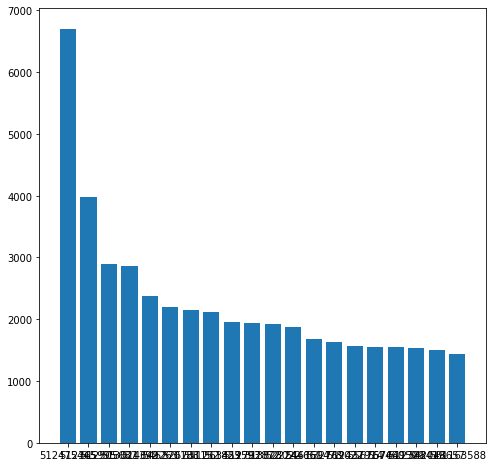

In [100]:
plt.bar(shoper20["user_id"].astype(str)
        , shoper20["user_session"].astype("int64")
        )

In [101]:
#매출액이 높은 고객
buyer = csv[csv["event_type"] == "purchase"].groupby("user_id")["price"].sum().sort_values(ascending=False)

<BarContainer object of 20 artists>

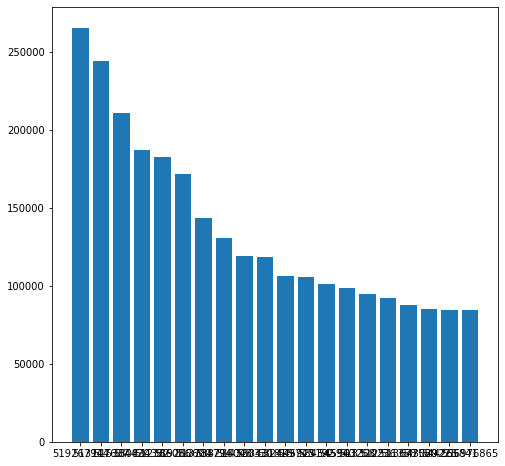

In [102]:
buyer20 = buyer[:20].reset_index()
plt.bar(buyer20["user_id"].astype(str)
        , buyer20["price"].astype("int64")
        )

In [103]:
#아직안쓰임
csv[csv["event_type"] == "cart"]

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
583,2019-10-01 00:09:33 UTC,cart,1002524,2053013555631882655,electronics.smartphone,apple,515.67,524325294,0b74a829-f9d7-4654-b5b0-35bc9822c238
680,2019-10-01 00:11:00 UTC,cart,4804056,2053013554658804075,electronics.audio.headphone,apple,161.98,533624186,e5ac3caa-e6d5-4d6b-ae06-2c18cd9ca683
1325,2019-10-01 02:17:59 UTC,cart,1004833,2053013555631882655,electronics.smartphone,samsung,174.76,536415846,685b5b42-f597-4a69-ab4c-ef96a30bc454
1654,2019-10-01 02:19:36 UTC,cart,1005003,2053013555631882655,electronics.smartphone,huawei,258.21,513632293,f2cc68f7-39d1-4a50-9dcf-f2a0921bdfda
1684,2019-10-01 02:19:43 UTC,cart,1004750,2053013555631882655,electronics.smartphone,samsung,197.43,555110488,ce885079-4d92-4fe6-92a3-377c5a2d8291
...,...,...,...,...,...,...,...,...,...
42447907,2019-10-31 23:53:29 UTC,cart,1004767,2053013555631882655,electronics.smartphone,samsung,242.63,542774966,957dc70c-31d3-42b7-aef0-2d2827c35251
42448124,2019-10-31 23:55:07 UTC,cart,1005134,2053013555631882655,electronics.smartphone,apple,1889.07,566280291,20715c6f-d6fc-4ed4-9d48-c7c2b5d03602
42448135,2019-10-31 23:55:10 UTC,cart,1005134,2053013555631882655,electronics.smartphone,apple,1889.07,566280291,20715c6f-d6fc-4ed4-9d48-c7c2b5d03602
42448156,2019-10-31 23:55:14 UTC,cart,1003306,2053013555631882655,electronics.smartphone,apple,577.89,512717356,f35ac37c-9573-4e30-b3d9-c09bb0b95a2b


In [104]:
def is_depth2(df):
        splitted = df.split(".")
        length = len(splitted)
        if length == 3:
                return splitted[2]
        elif length == 2:
                return splitted[1]

csv["depth1"] = csv["category_code"].apply(lambda x : x.split(".")[0])
csv["depth2"] = csv["category_code"].apply(is_depth2)

In [105]:
csv.to_csv('./2019-Oct-depth.csv')